## **Understanding the problem at Hand**

When you're planning to buy an used car, deciding whether the car is worth the advertised price or not is a daunting task. Several factors contribute to the price of an used car like model, make, mileage, year, etc., amongst others. Even from the seller's point of view, deciding the price at which he/she wants to price the car is a dilema.

We've been contacted by an automobile consulting company to understand the factors on which the pricing of the car depends.

Specifically, they want to understand the factors affecting the pricing of cars.

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

The task at hand for us is to predict the price of an used car appropriately based on the existing data using machine learning algorithms. We need to use our data exploration skills and find out the importance of each variable in predicting the price of an used car


In [ ]:
#importing the necessary packages

import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.style
from scipy.stats import zscore


from sklearn.svm import SVR
import statsmodels.api as sm
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from statsmodels.compat import lzip
from sklearn.impute import KNNImputer
import statsmodels.formula.api as smf

from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")
%matplotlib inline


**Let's take a look at the description of each of the features we have**

In [ ]:
#Reading the data dictionary file to understand the features that we've at hand.
data_dict=pd.read_excel('data dictionary.xlsx',index_col = 0)
print(data_dict.to_string())

                                                                                Description
Attribute                                                                                  
Name                                                         The brand and model of the car
Location           The location in which the car is being sold or is available for purchase
Year                                                       The year or edition of the model
Kilometers_Driven     The total kilometers driven in the car by the previous owner(s) in KM
Fuel_Type                                                  The type of fuel used by the car
Transmission                                       The type of transmission used by the car
Owner_Type                         Whether the ownership is Firsthand, Second hand or other
Mileage                    The standard mileage offered by the car company in kmpl or km/kg
Engine                                          The displacement volume of the e

 **Now that we've got a basic understanding of what each feature means, let's dive into the data**

In [ ]:
#Reading the data into a pandas dataframe
cars_data = pd.read_csv("cars-data.csv", index_col=[0])

In [ ]:
print("Shape of our dataset is: ",cars_data.shape)

Shape of our dataset is:  (6019, 13)


*    In our dataset, We've the records of 6019 cars along with 13 attributes describing them.

### **Now that we've got a basic understanding of what each feature means, let's dive into the data**

In [ ]:
cars_data.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,NaN,17.74


In [ ]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


##### **Observation:** 

*    Price is our 'target' variable.
*   Year, Kilometers_Driven, Seats, Price are the numerical data from our dataset. But seats ought be considered categorical.
*   Although Engine and Power are of object type, they can be converted to numerical if we do some preprocessing
*   In the dataset, some of the features have less than 6019 "Non-Null count" implying that there are missing values in those columns(6019 is the total no. of observations)




Now, let us find out if we have any duplicate values in our dataset 

In [ ]:
cars_data.duplicated().sum()

0

This shows that we don't have any duplicate observations in our dataset.

### **Unique Values Analysis**

Let us analyse the  number of unique values in each of our attributes

In [ ]:
unique_counts = []
for col in cars_data.columns:
    unique_counts.append((col, cars_data[col].nunique()))
unique_counts = sorted(unique_counts, key=lambda x: x[1],reverse = True)
print("No of unique values in each column are as follows:(In Descending order)\n")
for col,nunique in unique_counts:
    print(f"{col}: {nunique}: {round(nunique/6019*100,2)}%")

No of unique values in each column are as follows:(In Descending order)

Kilometers_Driven: 3093: 51.39%
Name: 1876: 31.17%
Price: 1373: 22.81%
New_Price: 540: 8.97%
Mileage: 442: 7.34%
Power: 372: 6.18%
Engine: 146: 2.43%
Year: 22: 0.37%
Location: 11: 0.18%
Seats: 9: 0.15%
Fuel_Type: 5: 0.08%
Owner_Type: 4: 0.07%
Transmission: 2: 0.03%


### Missing Value Analysis

In [ ]:
def get_missing_data_details(df):
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False,)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing = missing[missing["Percent"]>0]
  
    plt.figure(figsize = (5,5))
    sns.barplot(x=missing["Percent"], y=missing.index)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percentage', fontsize=15)
    plt.title('Missing Data %', fontsize=15)

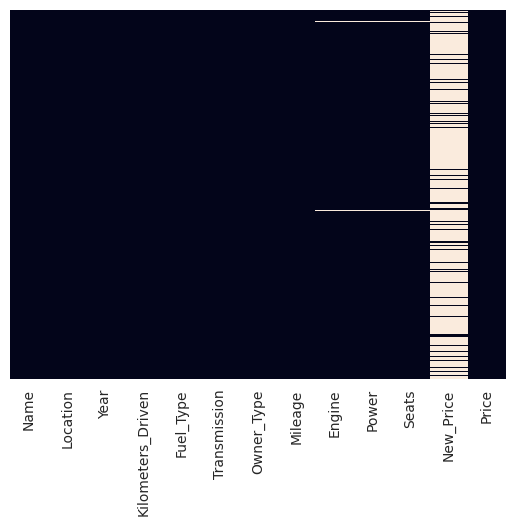

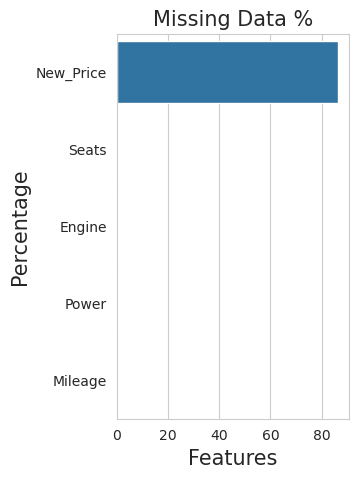

In [ ]:
get_missing_data_details(cars_data)

In [ ]:
for col in cars_data.columns:
  if cars_data[col].isnull().sum()!=0:
    print(f"{col}: {cars_data[col].isnull().sum()}: {round(cars_data[col].isnull().mean()*100,2)}%")

Mileage: 2: 0.03%
Engine: 36: 0.6%
Power: 36: 0.6%
Seats: 42: 0.7%
New_Price: 5195: 86.31%



**Observations**

*   Columns other than New_Price have very less amount of missing values which need to be imputed appropriately.
*   New_Price has more than 86% values missing in it. Most of the times, such columns can be safely removed. Let's see what the data dictionary says about this variable.


In [ ]:
data_dict.loc['New_Price']

Description    Price of new model
Name: New_Price, dtype: object

*   Data dictionary defines New_Price as the price of a new model.
*   Although this could be an important variable, having to deal with 86% of missing data adds a lot of noise to our dataset. So, We have to remove this variable



In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
cars_data.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,6019,6019,6019.00,6019.00,6019,6019,6019,6017,5983,5983,5977.00,824,6019.00
unique,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,540,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,6,NaN
mean,NaN,NaN,2013.36,58738.38,NaN,NaN,NaN,NaN,NaN,NaN,5.28,NaN,9.48
std,NaN,NaN,3.27,91268.84,NaN,NaN,NaN,NaN,NaN,NaN,0.81,NaN,11.19
min,NaN,NaN,1998.00,171.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.44
25%,NaN,NaN,2011.00,34000.00,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,3.50
50%,NaN,NaN,2014.00,53000.00,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,5.64
75%,NaN,NaN,2016.00,73000.00,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,9.95


**Observations:**
*   Out of 11 different locations, We can see that more than 13%(790) of observations are located in "Mumbai".
*   No of kilometers driven ranges from 171 to 6.5 lakh kilometres with atleast 75% values less than 73000, indicating that there might be some outliers
*   Fuel type of more than 53%(3205) Engines is Diesel.
*   Approximately 70%(4299) of the cars are manual transmission cars.
*   Furthermore, we can see that about 81% of cars are "first owned" 
*   The min no of seats is 0 - indicating an error in our data, as a 'zero seater' car seems highly improbable to exist.
* Average no of seats in a car is 5 and the maximum number of seats are 10
*   We can also observe that Diesel engines are predominantly found in our dataset
*   Price of the car ranges from 44,000 to 1.6 Crores with atleast 75% values less than 9.95 lakhs - outlier indication again



### **Tweaking the Dataset to find more interesting patterns**
*    *We can see that **Year** is considered a **continuous variable**. Let's **convert** it to a **categorical variable** to get a better summary.*
*    *As some of the cars are run on **gas(CNG, LPG)**, We see that Mileage for those cars is recorded in **"km/kg"** where as **petrol/diesel** cars have their mileage in **kmpl**. Let's see if we can convert **km/kg** into **kmpl** and find anything interesting after we make it a numerical value.*
*   *Although we have only **824 non null observations** in the **New Price** column, they're currently in string format. Let's see if we can **convert them to numbers** and derive any interesting value out of that.*
*   Although **'Mahindra XUV500 W8 2WD'** is the car with most no of sales, it's not so significant as it is less than 1%(49) of total sales. 
*   So, from the **'Name'** variable, we can try to derive the Manufacturer of each car i.e., the brand name and pursue deeper.



### **Let's try converting those variables appropriately to see if there's anything interesting lurking beyond the values**

In [ ]:
#This function extracts the string part from the values and returns a distinct set of those values
def analyse_columnwise_data(data):
    res = data.str.findall('[a-zA-Z]+',)
    res = [x[0] for x in res if x is not np.nan ]
    return set(res)
  
def get_brand(s):
    return s.split()[0].lower()

def get_model(s):
    return s.split()[1].lower()

In [ ]:
# import pdb
analyse_columnwise_data(cars_data['New_Price'])

{'Cr', 'Lakh'}

In [ ]:
analyse_columnwise_data(cars_data['Mileage'])

{'km', 'kmpl'}

In [ ]:
analyse_columnwise_data(cars_data['Engine'])

{'CC'}

### From the above, we can see:
  
*   Price has numeric values which might be lakhs or crores. Similarly,
*   Mileage has km/kg and kmpl as units.
*   Enginee has only 'CC' attached at the end of it.

So, we need to deal with these columns accordingly and convert the values

In [ ]:
#This function removes the string part from the new_price values and converts them into float. 
def convert_new_price(s):
  if type(s) == str:
    s = s.lower()
    if "lakh" in s: #If the value is in lakhs, we're removing the non-numeric part and converting it into float value
      s = s.strip("lakh")
      s = float(s)
    elif "cr" in s: #If the value is in crores, after removing the non-numeric part, we're converting it into lakhs by multiplying it with 100
      s = s.strip("cr")
      s = float(s)*100
  return s

In [ ]:
#This function removes the string part from the Mileage values and converts them into float. 
def adjust_mileage(s):
  if type(s) == str:
    s = s.lower()
    if 'kmpl' in s:
      s = s.strip('kmpl')
    if 'km/kg' in s:
      s = s.strip('km/kg')
      s = float(s)*1.8 #converting km/kg into kmpl assuming 1kg = 1.8 litres of LPG/CNG
  return s

In [ ]:
cars_data['Brand'] = cars_data['Name'].apply(get_brand)
cars_data['Model'] = cars_data['Name'].apply(get_model)

cars_data.describe(include='all')#converting Year to string
cars_data['Year_converted'] = cars_data['Year'].astype('str')
cars_data['Engine_converted'] = cars_data['Engine'].str.strip('CC').astype('float') 

#converting Mileage to numeric value
cars_data['Mileage_converted'] = cars_data['Mileage'].apply(adjust_mileage) #removes the non numeric part of the values
cars_data['Mileage_converted'] = cars_data['Mileage_converted'].astype('float')

cars_data['Power'] = cars_data['Power'].str.strip("bhp")
cars_data['Power'] = pd.to_numeric(cars_data['Power'],errors='coerce')

#Converting New Price value into numeric value appropriately
cars_data['New_Price_converted'] = cars_data['New_Price'].apply(convert_new_price) 

In [ ]:
cars_data.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Year_converted,Engine_converted,Mileage_converted,New_Price_converted
count,6019,6019,6019.00,6019.00,6019,6019,6019,6017,5983,5876.00,5977.00,824,6019.00,6019,6019,6019,5983.00,6017.00,824.00
unique,1876,11,NaN,NaN,5,2,4,442,146,NaN,NaN,540,NaN,30,211,22,NaN,NaN,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,NaN,NaN,95.13 Lakh,NaN,maruti,swift,2014,NaN,NaN,NaN
freq,49,790,NaN,NaN,3205,4299,4929,172,606,NaN,NaN,6,NaN,1211,353,797,NaN,NaN,NaN
mean,NaN,NaN,2013.36,58738.38,NaN,NaN,NaN,NaN,NaN,113.25,5.28,NaN,9.48,NaN,NaN,NaN,1621.28,18.35,23.08
std,NaN,NaN,3.27,91268.84,NaN,NaN,NaN,NaN,NaN,53.87,0.81,NaN,11.19,NaN,NaN,NaN,601.36,5.37,26.18
min,NaN,NaN,1998.00,171.00,NaN,NaN,NaN,NaN,NaN,34.20,0.00,NaN,0.44,NaN,NaN,NaN,72.00,0.00,3.91
25%,NaN,NaN,2011.00,34000.00,NaN,NaN,NaN,NaN,NaN,75.00,5.00,NaN,3.50,NaN,NaN,NaN,1198.00,15.26,7.98
50%,NaN,NaN,2014.00,53000.00,NaN,NaN,NaN,NaN,NaN,97.70,5.00,NaN,5.64,NaN,NaN,NaN,1493.00,18.19,11.67
75%,NaN,NaN,2016.00,73000.00,NaN,NaN,NaN,NaN,NaN,138.10,5.00,NaN,9.95,NaN,NaN,NaN,1984.00,21.10,26.56


**Observations:**
*  The brand **Maruti** is the most sold car brand, while **swift** model is the mostly sold car model.
*   More than 13%(797) of cars were sold in the year 2014 based on the 'new_year' column.
* The most repeated value for Engine is 1197 CC. 
* We can also see that atleast 75% of Engines are less than 1984 CC, with maximum value being 5988 CC. This indicates probable outliers exist in this column. 
*   We can see that there're 22 unique values here meaning we've 22 years of data. Combining this to the fact that min and max values are 1998 and 2019, we can figure that we've car models manufactured across 22 years, from 1998 to 2019.
*   In the new price, we can see that the average new price is 23.08 lakhs. 
*   Although the max value is 230L, we can see that atleast 75% of the values are less than 26.56L.
*   The average mileage is 18.35 kmpl while max mileage is 60.37 kmpl and minimum is 0 kmpl - which seems to be an error in the data and we need to handle it.





# **Univariate Analysis**


In [ ]:
numerical = ['Kilometers_Driven', 'New_Price_converted', 'Mileage_converted', 'Engine_converted','Power','Year','Price']
categorical = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats','Year_converted','Brand','Model']

In [ ]:
# Looking at the unique values of Categorical Features
print(cars_data['Location'].unique())
print(cars_data['Fuel_Type'].unique())
print(cars_data['Transmission'].unique())
print(cars_data['Owner_Type'].unique())


['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [ ]:
#This class is used to style our output in various formats 
class style:
#These are the ANSI escape sequences to set Graphics in our output
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   BLINK = '\033[5m'
   END = '\033[0m'

In [ ]:
# for i,var in enumerate(categorical):
#   print(f"{i+1}. No of unique values in {style.BOLD}{var}{style.END} are: {cars_data[var].nunique()}. \nThe distribution is as follows:")
#   print(f"{style.BOLD}{var}{style.END}\n{cars_data[var].value_counts()}\n")

### Now, let us perform analysis using various numerical and graphical techniques on each of our variables

In [ ]:
def univariate_analysis_categorical(cat, i):
  print(f"\t\t{style.BOLD}Univariate Analysis of {cat}")
  print(f"-----------------------------------------------------------{style.END}")
  print(f"{i+1}. No of unique values in {style.BOLD}{cat}{style.END} are: {cars_data[cat].nunique()}. \nThe distribution is as follows:")
  print(f"{style.BOLD}{cat}{style.END}\n{cars_data[cat].value_counts()}\n")
  vc = cars_data[cat].value_counts()
  if len(vc.index)<=5:
    g = sns.countplot(x=cat, data=cars_data, palette = 'pastel', order = cars_data[cat].value_counts().index)
  elif len(vc.index)>5 and len(vc.index)<=15:
    g = sns.countplot(y=cat, data=cars_data, palette = 'pastel', order = cars_data[cat].value_counts().index)
  elif len(vc.index)>15:
    g = sns.countplot(x=cat, data=cars_data, palette = 'pastel',order = cars_data[cat].value_counts().index)
    g.set_xticklabels(labels = g.get_xticklabels(), rotation = 90)  

  plt.show()
  print("\t")

		Univariate Analysis of Location
-----------------------------------------------------------
1. No of unique values in Location are: 11. 
The distribution is as follows:
Location
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64



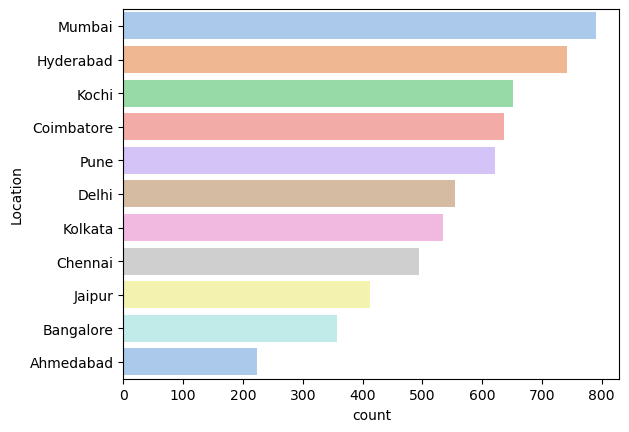

	
		Univariate Analysis of Fuel_Type
-----------------------------------------------------------
2. No of unique values in Fuel_Type are: 5. 
The distribution is as follows:
Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64



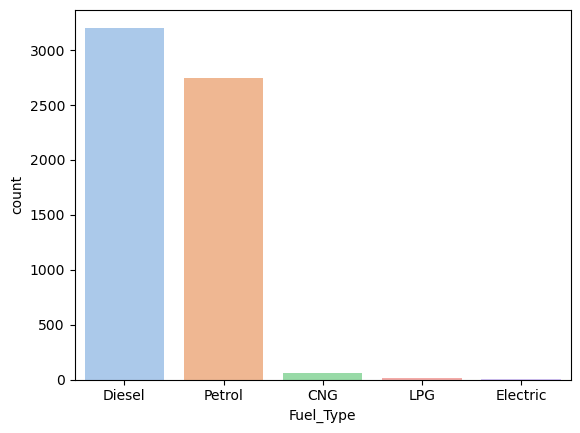

	
		Univariate Analysis of Transmission
-----------------------------------------------------------
3. No of unique values in Transmission are: 2. 
The distribution is as follows:
Transmission
Manual       4299
Automatic    1720
Name: Transmission, dtype: int64



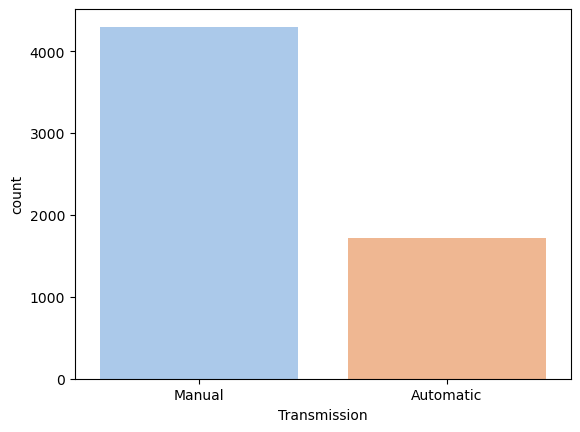

	
		Univariate Analysis of Owner_Type
-----------------------------------------------------------
4. No of unique values in Owner_Type are: 4. 
The distribution is as follows:
Owner_Type
First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64



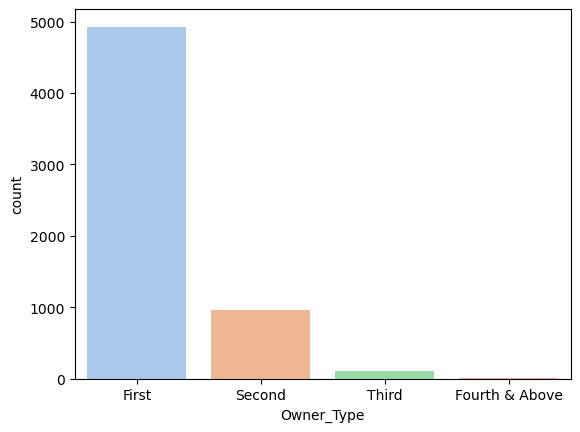

	
		Univariate Analysis of Seats
-----------------------------------------------------------
5. No of unique values in Seats are: 9. 
The distribution is as follows:
Seats
5.00     5014
7.00      674
8.00      134
4.00       99
6.00       31
2.00       16
10.00       5
9.00        3
0.00        1
Name: Seats, dtype: int64



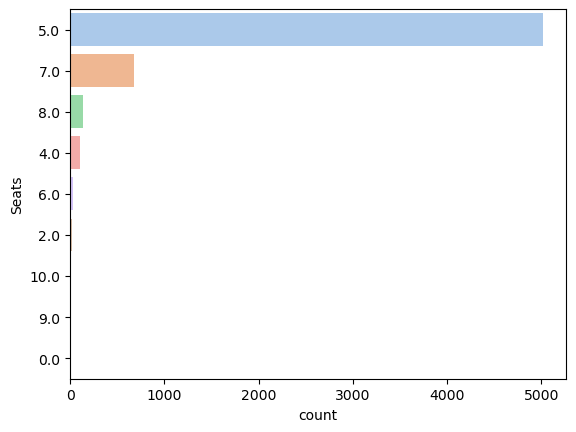

	
		Univariate Analysis of Year_converted
-----------------------------------------------------------
6. No of unique values in Year_converted are: 22. 
The distribution is as follows:
Year_converted
2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
2000      4
1998      4
1999      2
Name: Year_converted, dtype: int64



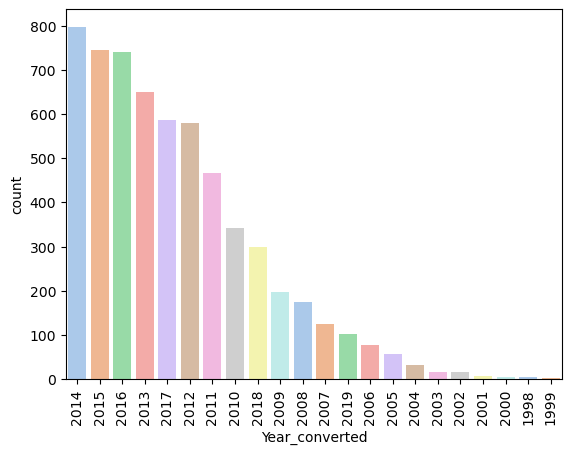

	
		Univariate Analysis of Brand
-----------------------------------------------------------
7. No of unique values in Brand are: 30. 
The distribution is as follows:
Brand
maruti           1211
hyundai          1107
honda             608
toyota            411
mercedes-benz     318
volkswagen        315
ford              300
mahindra          272
bmw               267
audi              236
tata              186
skoda             173
renault           145
chevrolet         121
nissan             91
land               60
jaguar             40
fiat               28
mitsubishi         27
mini               26
volvo              21
porsche            18
jeep               15
datsun             13
isuzu               3
force               3
smart               1
ambassador          1
bentley             1
lamborghini         1
Name: Brand, dtype: int64



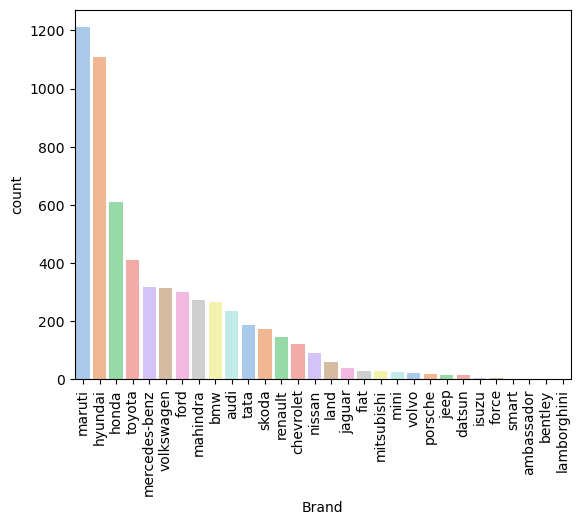

In [ ]:
for i,x in enumerate(categorical):
  if x not in ['Model']:
    univariate_analysis_categorical(x, i)  
    # f = px.bar(x=cars_data[x])
    # f.show()

In [ ]:
print(round(cars_data[(cars_data['Brand']=='hyundai') | 
            (cars_data['Brand']=='maruti') 
           ].shape[0]/6019*100,2), "% of market is owned by Hyundai and Maruti")

38.51 % of market is owned by Hyundai and Maruti


In [ ]:
print(round(cars_data[(cars_data['Seats']==5) & 
           (cars_data['Transmission']=='Manual') & 
           ((cars_data['Fuel_Type']=='Petrol') | (cars_data['Fuel_Type']=='Diesel')) &
           ((cars_data['Owner_Type']=='First'))
           ].shape[0]/cars_data.shape[0]*100,2), "% of cars Manual Transmission cars run either on diesel or petrol and are first hand owned 5 seaters")

48.4 % of cars Manual Transmission cars run either on diesel or petrol and are first hand owned 5 seaters


## **Observations**
From the above plots, we've tried to analyse each of our categorical variables individually. In other words, we've tried to see how the number of cars are distributed in each of the following categories - Location, Fuel_Type, Transmission, Owner_Type, Year, Brand, Model.



*   We can see that most number of cars are sold in Mumbai(\~780), followed by Hyderabad and Kochi and the Least number of cars were sold in Ahmedabad(\~210).
*   Diesel cars are the most frequently encountered cars followed closely by Petrol. CNG, LPG and Electric are very less in number.
*   Majority of the cars(\~4000) are Manual while the others are Automatic.
*   As far as ownership is considered, First owned cars predominate our dataset, followed by second, third and fourth and above.
*   The highest number of sold were manufactured in 2014, followed by 2015 and 2016 while the number of cars manufactured from 1998 to end of 2001 seems to sold very less.
*   Cars from 31 different car manufacturers are found in our data, with Maruti being the highest in number.
*   More than 83% of cars are 5 seaters.

*   **From the above, we can infer that Maruti and Hyundai rule over 40% of this competitive market**
*   **First hand owned Manual Transmission cars which run on diesel or petrol and are 5 seaters are favoured by the customers - more than 48% of the cars fall under this category.**


### **Analyzing the Continuous(numerical) Variables**

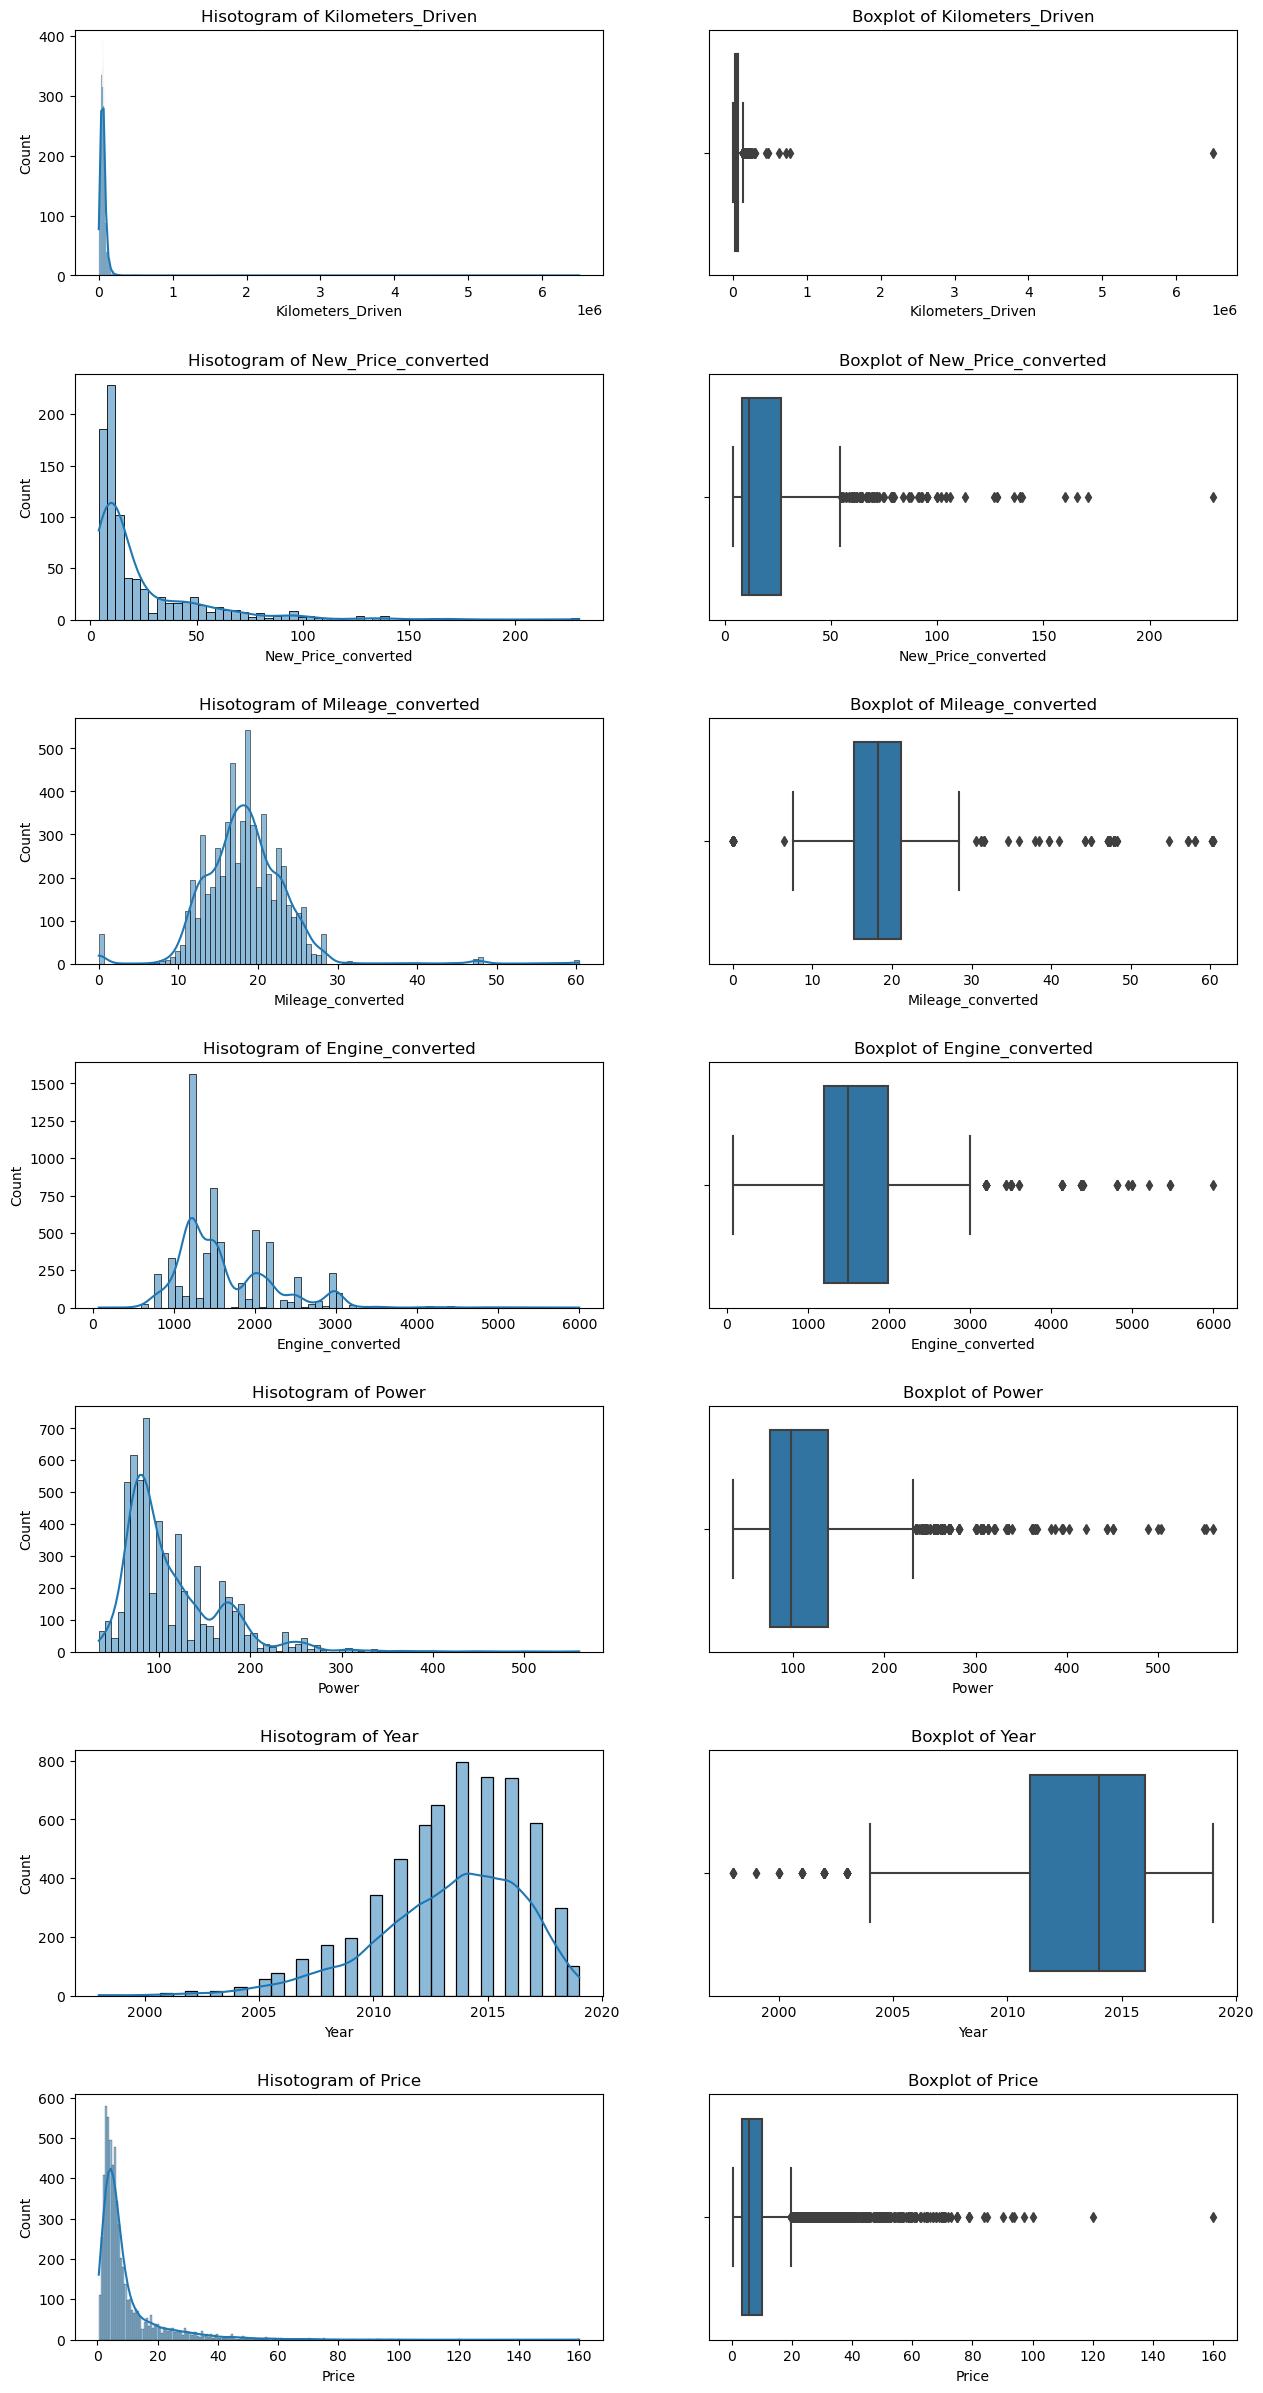

In [ ]:
fig, axes = plt.subplots(nrows=len(numerical),ncols=2,  figsize=(15, 30))
fig.subplots_adjust(hspace = .4, wspace=.2)
i = 0
for col in numerical:
    if cars_data[col].dtype == 'int64' or cars_data[col].dtype == 'float64':
        g = sns.histplot(x = cars_data[col], ax=axes[i][0], kde=True)
        g.set_title("Hisotogram of " + col)
        sns.boxplot(x = cars_data[col], ax=axes[i][1]).set_title("Boxplot of " + col)
        i = i + 1

### **Observations**:


*   Except Mileage, all the other variables are right skewed
*   Mileage seems to be a well distributed variable with more than 50% values between 15 to 25. Outliers are present here as well
*   Engine seems to be a slightly right skewed variable, with some outliers



### Let's check for outliers in our numerical variables

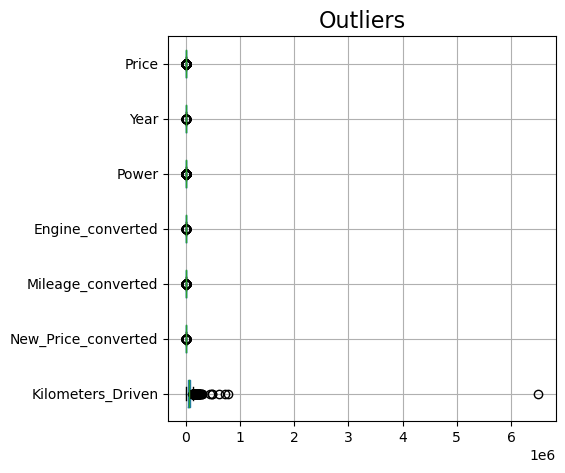

In [ ]:
plt.figure(figsize=(5,5))
cars_data[numerical].boxplot(vert=0)
plt.title('Outliers',fontsize=16)
plt.show()

In [ ]:
cars_data[numerical].max().sort_values()

Mileage_converted          60.37
Price                     160.00
New_Price_converted       230.00
Power                     560.00
Year                     2019.00
Engine_converted         5998.00
Kilometers_Driven     6500000.00
dtype: float64

As kilometers driven has high magnitude, we'll not consider the variable so that we can observe other variables, which are in a similar scale

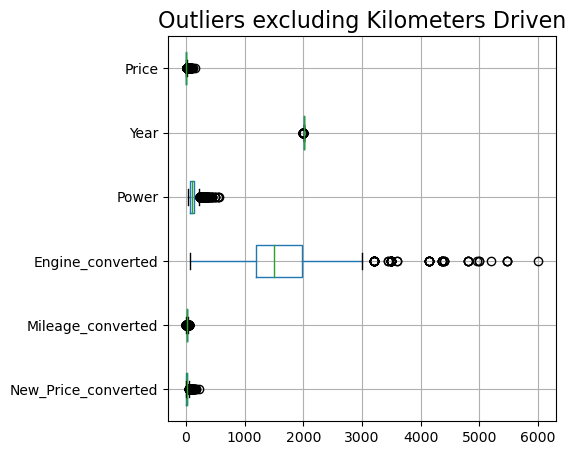

In [ ]:
plt.figure(figsize=(5,5))
cars_data[numerical].drop(['Kilometers_Driven'], axis=1).boxplot(vert=0)
plt.title('Outliers excluding Kilometers Driven',fontsize=16)
plt.show()

Although we can see that outliers exist, we cannot quantify them clearly due to difference in the scales of variables and difference in the magnitude of outliers. Let's try to quantify them below:

In [ ]:
# Number of outliers
def outlier_check(data,n):
    for col in data.columns:
        if data[col].dtype == 'int64' or data[col].dtype == 'float64':
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_range= Q1-(n * IQR)
            upper_range= Q3+(n * IQR)
            print(f"{style.BOLD}{col}{style.END}")
            print("Number of outliers:",data[(data[col] > upper_range) | (data[col] < lower_range)].shape[0])
            print("Percentage of outliers:{0:10.3f}".format(((data[(data[col] > upper_range) | (data[col] < lower_range)].shape[0])/data.shape[0])*100),"%\n")

In [ ]:
outlier_check(cars_data, 1.5)

Year
Number of outliers: 50
Percentage of outliers:     0.831 %

Kilometers_Driven
Number of outliers: 202
Percentage of outliers:     3.356 %

Power
Number of outliers: 238
Percentage of outliers:     3.954 %

Seats
Number of outliers: 963
Percentage of outliers:    15.999 %

Price
Number of outliers: 718
Percentage of outliers:    11.929 %

Engine_converted
Number of outliers: 61
Percentage of outliers:     1.013 %

Mileage_converted
Number of outliers: 125
Percentage of outliers:     2.077 %

New_Price_converted
Number of outliers: 86
Percentage of outliers:     1.429 %



### **Observations:**

*   Outliers are present in almost all the columns. 
*   We need to treat these columns appropriately so that we can build reliable models

# **Bivariate Analysis:**

### Now, let's begin Bi-variate Analysis. Here, we analyse 2 variables trying to find any relation between them

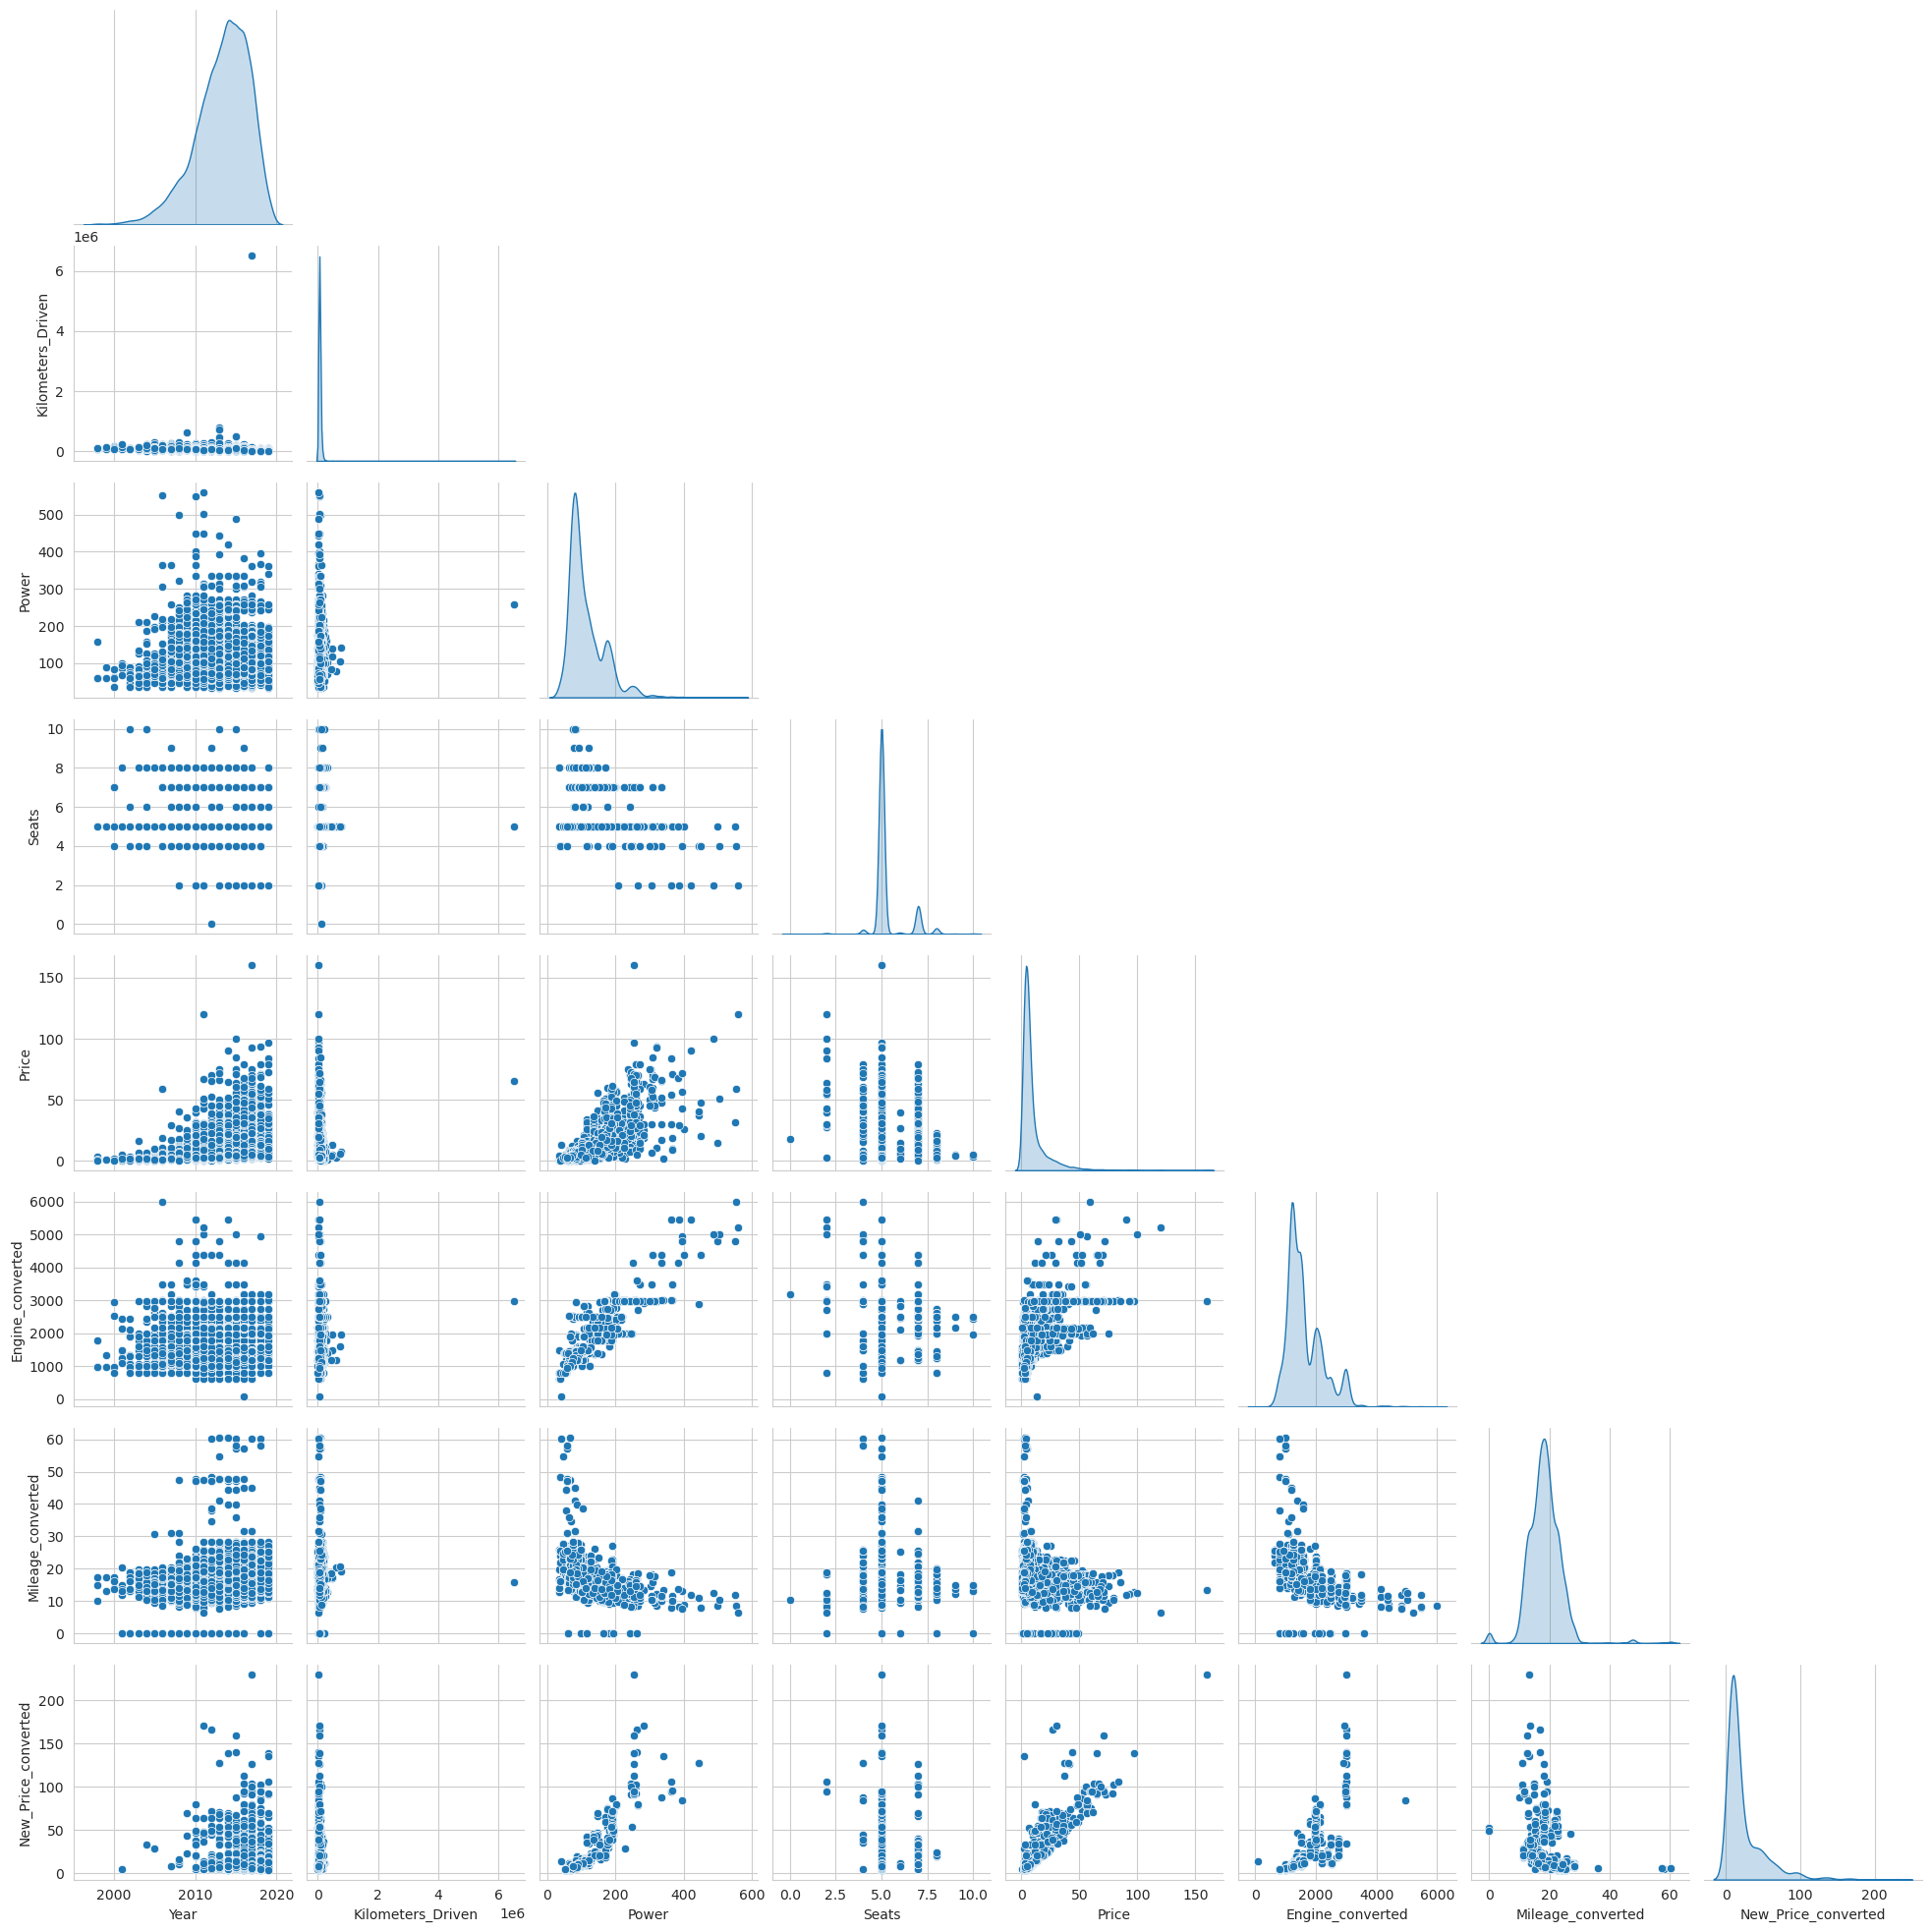

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(data=cars_data,corner = True, diag_kind="kde",)
plt.show()

<seaborn.axisgrid.PairGrid>

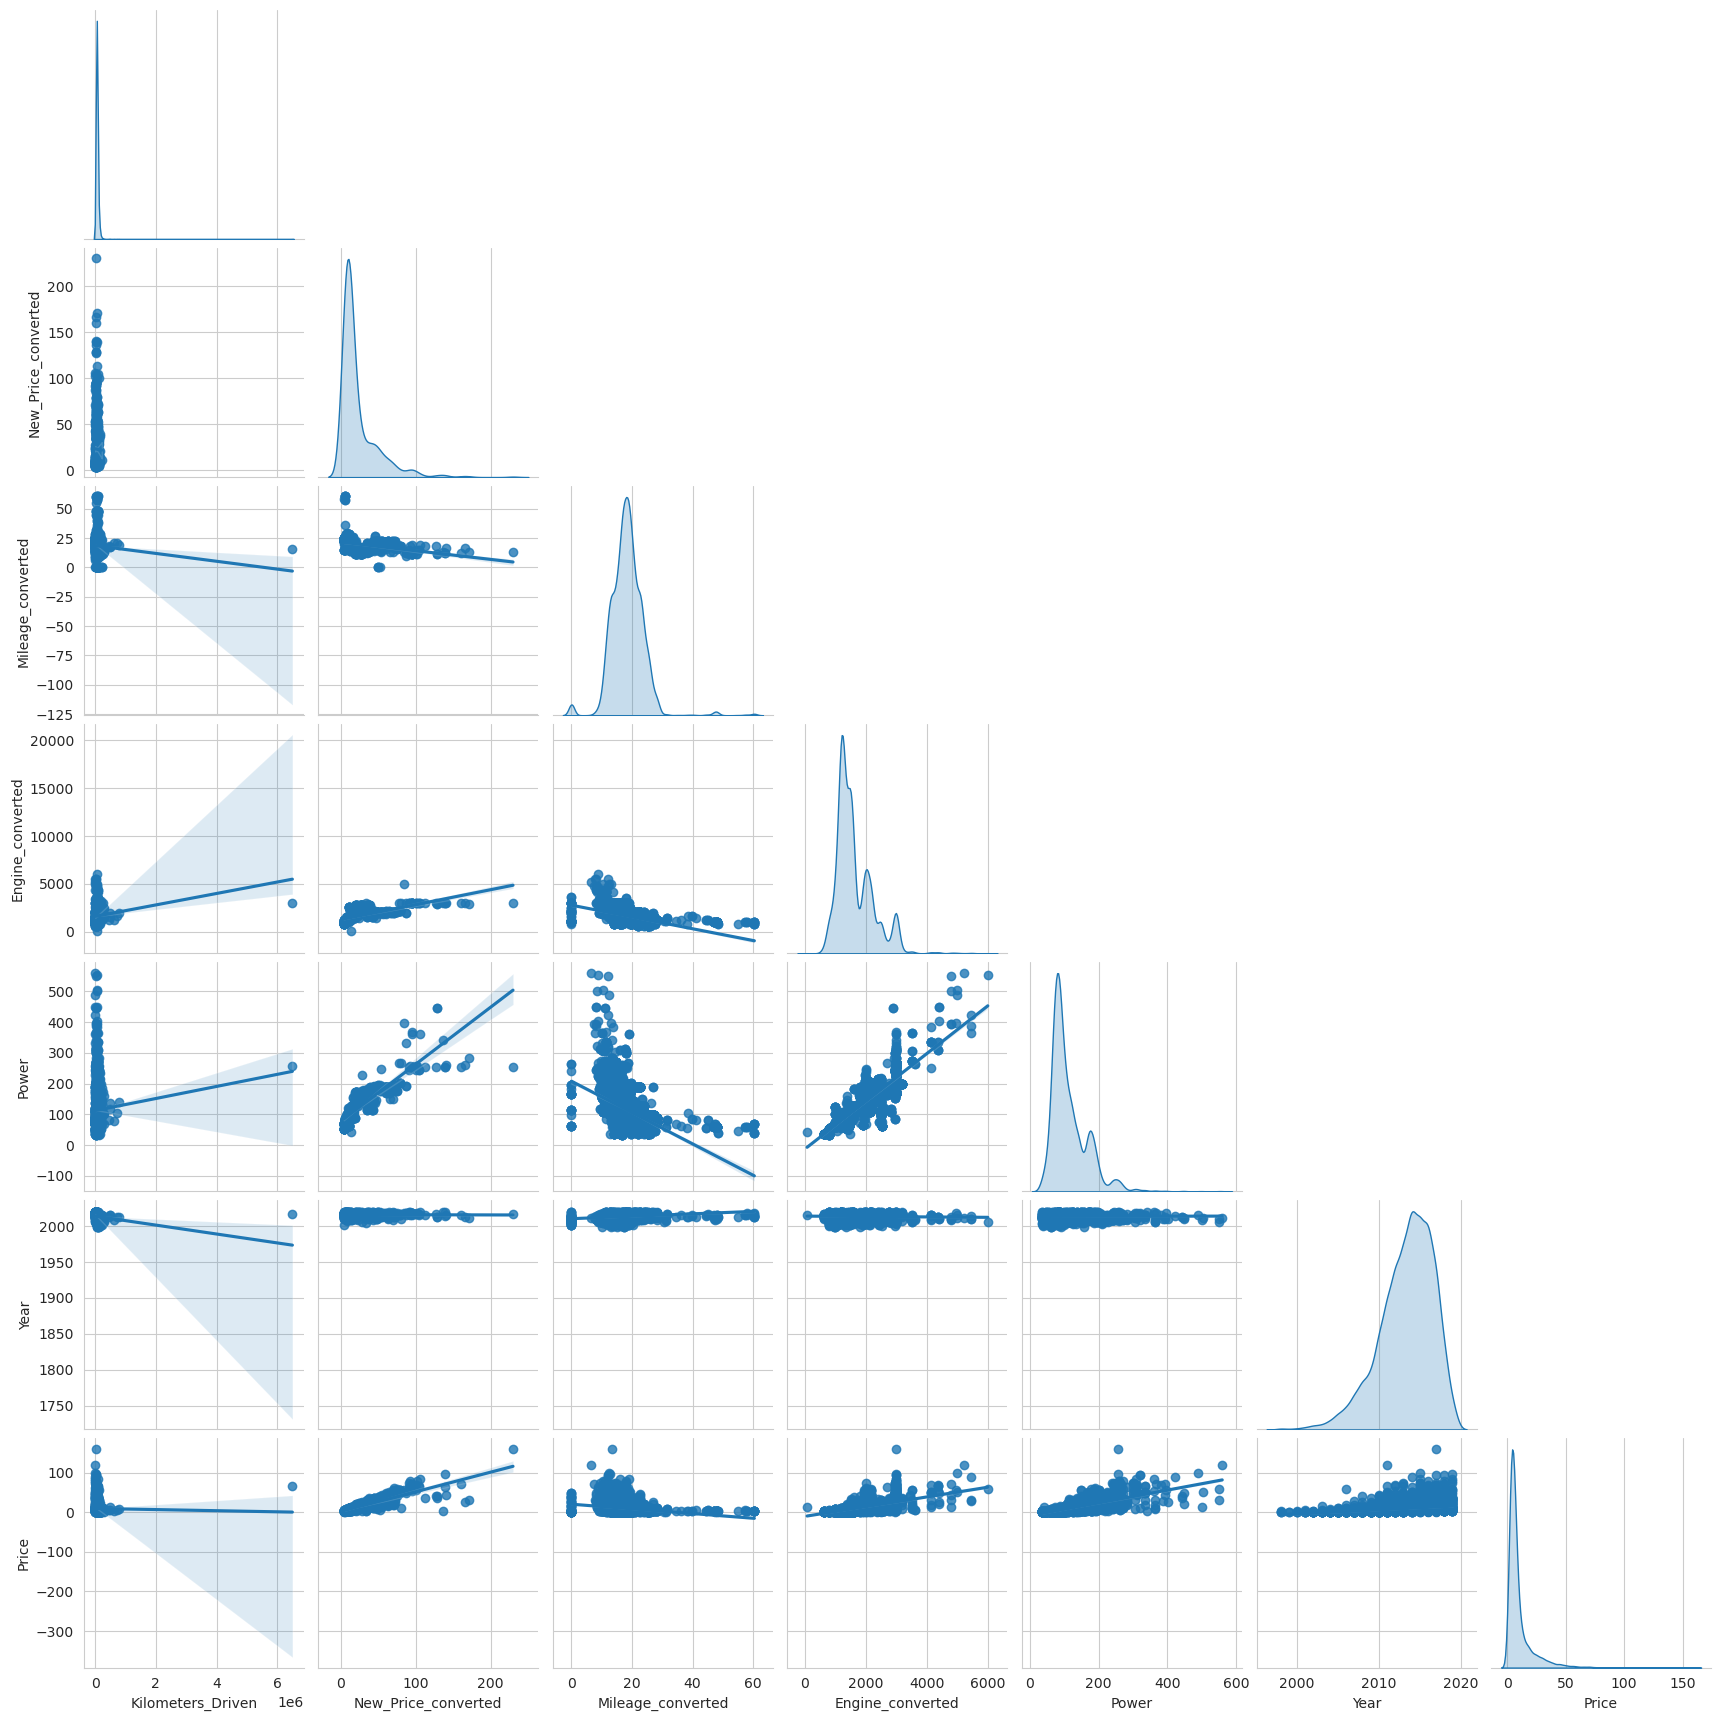

In [ ]:
#Let's add a regression line to the above graph to get a better picture
sns.pairplot(data = cars_data[numerical], kind='reg', diag_kind = 'kde',corner = True,)

### **Observations**

*   Based on the regression lines in the above graphs, we may conclude that the following paris of variables exhibit faint to considerable amounts of correlation
1. Price and New Price
2. Price and Mileage
3. Price and Engine
4. Price and Year
5. Price and Power
6. Power and Engine
7. Mileage and Engine
8. Engine and New Price


*    Although we can say that there exists some relationship between variables, we can't tell quantify that from the above graphs. 
*    So, let's quantify the amounts of correlation using Pearson Correlation and verify the above observations



<AxesSubplot: >

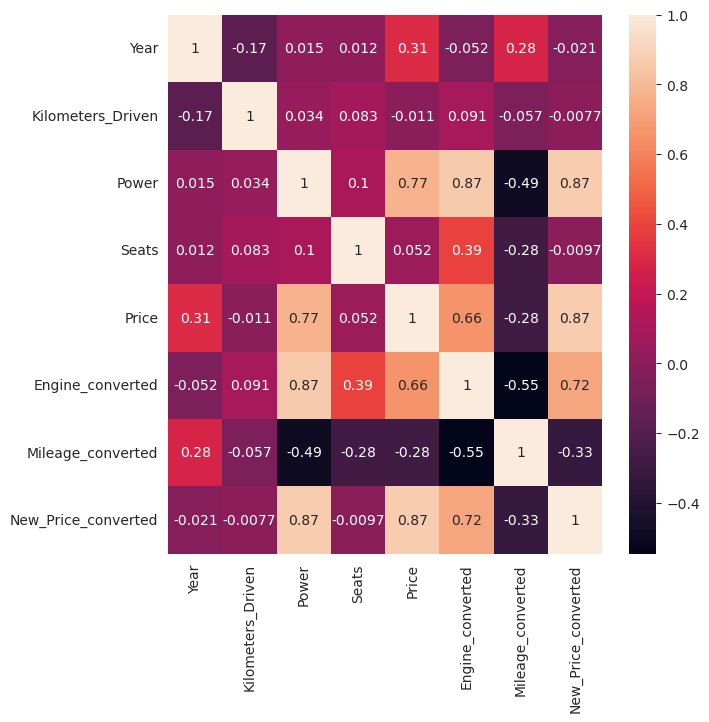

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(cars_data.corr(),annot=True)

##### **Observations:** 

* There is high positive correlation between Price - our dependant variable and ew Price, Power, Engine .
* High positive relation among New_Price_converted, Engine, Power. This suggests the presence of Multicolinearity among these variables.
* Slightly negative corelation can be seen between Mileage and price, Mileage and Power




<AxesSubplot: xlabel='Fuel_Type', ylabel='Price'>

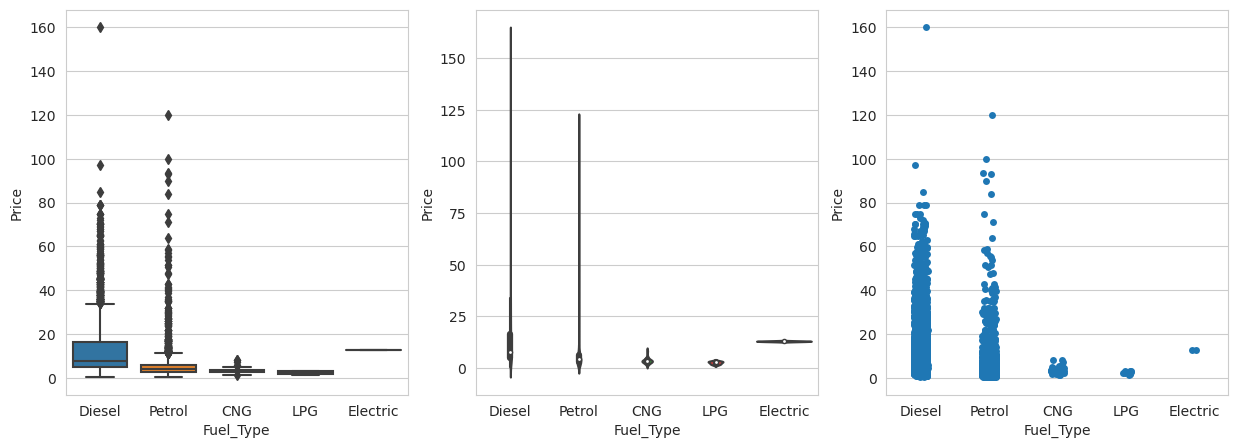

In [ ]:
x = 'Fuel_Type'
y = 'Price'
order=cars_data[x].value_counts().index
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
sns.boxplot(x=cars_data[x], y=cars_data[y], data=cars_data, order=order)
plt.subplot(1,3,2)
sns.violinplot(x=cars_data[x], y=cars_data[y], data=cars_data, order=order)
plt.subplot(1,3,3)
sns.stripplot(x=cars_data[x], y=cars_data[y], data=cars_data, order=order)

<AxesSubplot: xlabel='Owner_Type', ylabel='Price'>

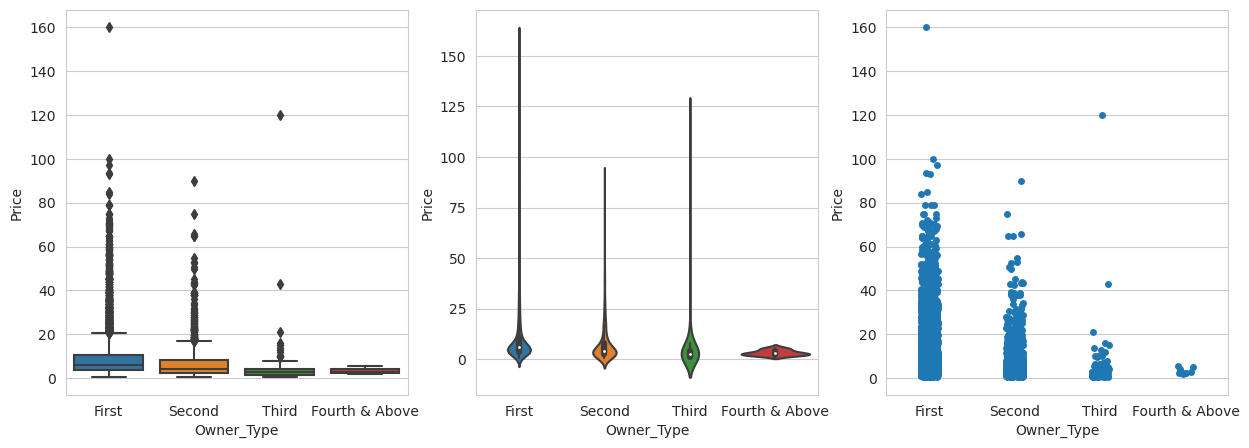

In [ ]:
x = 'Owner_Type'
y = 'Price'
order=cars_data[x].value_counts().index
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
sns.boxplot(x=cars_data[x], y=cars_data[y], data=cars_data, order=order)
plt.subplot(1,3,2)
sns.violinplot(x=cars_data[x], y=cars_data[y], data=cars_data, order=order)
plt.subplot(1,3,3)
sns.stripplot(x=cars_data[x], y=cars_data[y], data=cars_data, order=order)

<AxesSubplot: xlabel='Fuel_Type', ylabel='Mileage_converted'>

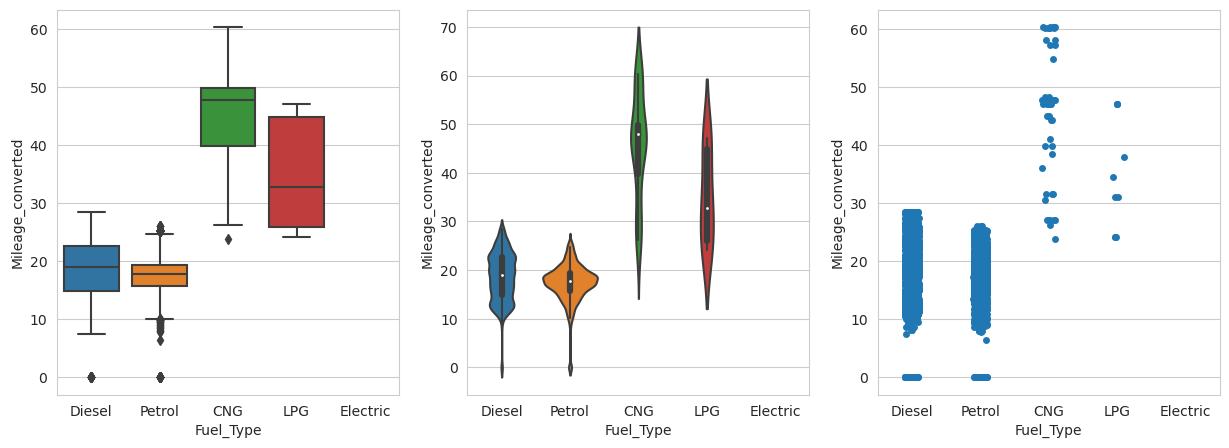

In [ ]:
x = 'Fuel_Type'
y = 'Mileage_converted'
order=cars_data[x].value_counts().index
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
sns.boxplot(x=cars_data[x], y=cars_data[y], data=cars_data, order=order)
plt.subplot(1,3,2)
sns.violinplot(x=cars_data[x], y=cars_data[y], data=cars_data, order=order)
plt.subplot(1,3,3)
sns.stripplot(x=cars_data[x], y=cars_data[y], data=cars_data, order=order)

<AxesSubplot: xlabel='Transmission', ylabel='Mileage_converted'>

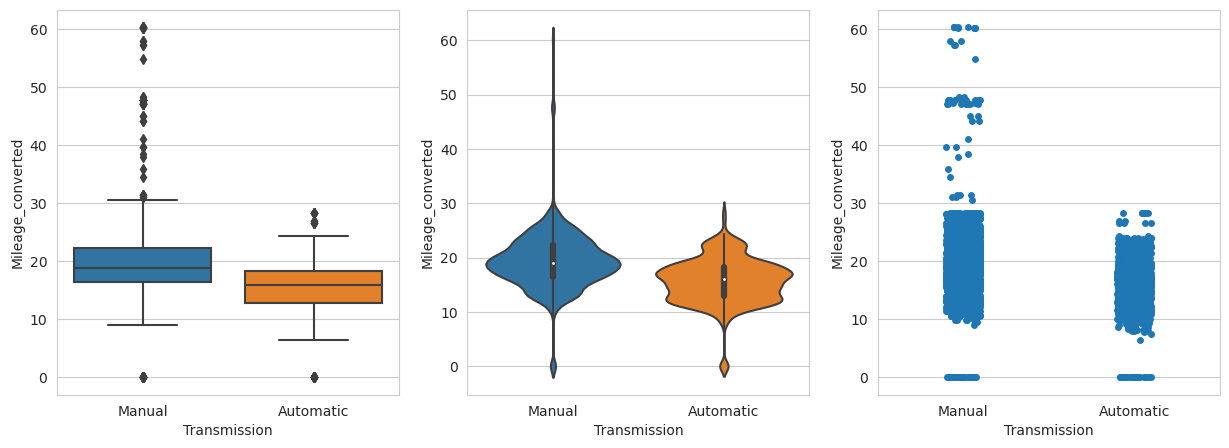

In [ ]:
x = 'Transmission'
y = 'Mileage_converted'
order=cars_data[x].value_counts().index
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
sns.boxplot(x=cars_data[x], y=cars_data[y], data=cars_data, order=order)
plt.subplot(1,3,2)
sns.violinplot(x=cars_data[x], y=cars_data[y], data=cars_data, order=order)
plt.subplot(1,3,3)
sns.stripplot(x=cars_data[x], y=cars_data[y], data=cars_data, order=order)

<AxesSubplot: xlabel='Fuel_Type', ylabel='Engine_converted'>

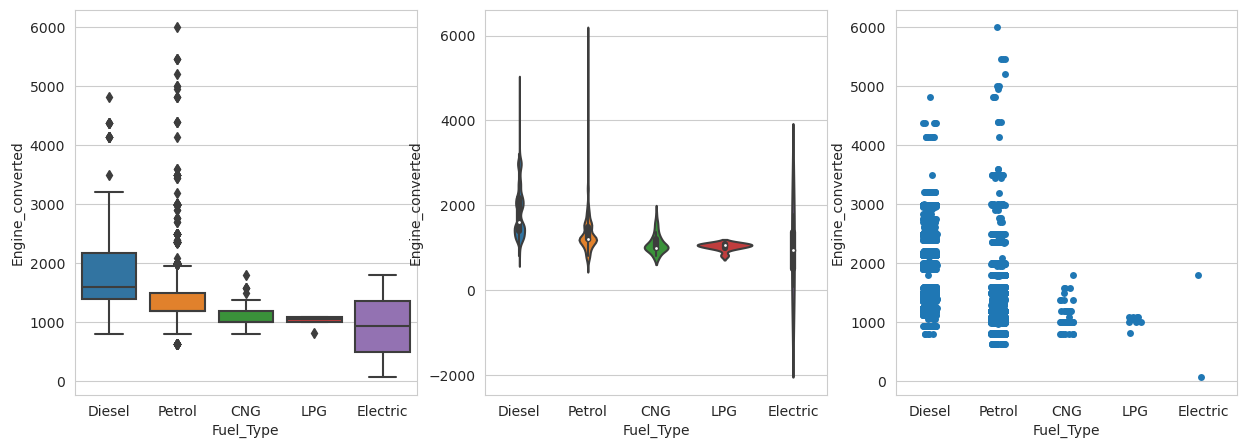

In [ ]:
x = 'Fuel_Type'
y = 'Engine_converted'
order=cars_data[x].value_counts().index
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
sns.boxplot(x=cars_data[x], y=cars_data[y], data=cars_data, order=order)
plt.subplot(1,3,2)
sns.violinplot(x=cars_data[x], y=cars_data[y], data=cars_data, order=order)
plt.subplot(1,3,3)
sns.stripplot(x=cars_data[x], y=cars_data[y], data=cars_data, order=order)

<AxesSubplot: xlabel='Seats', ylabel='Price'>

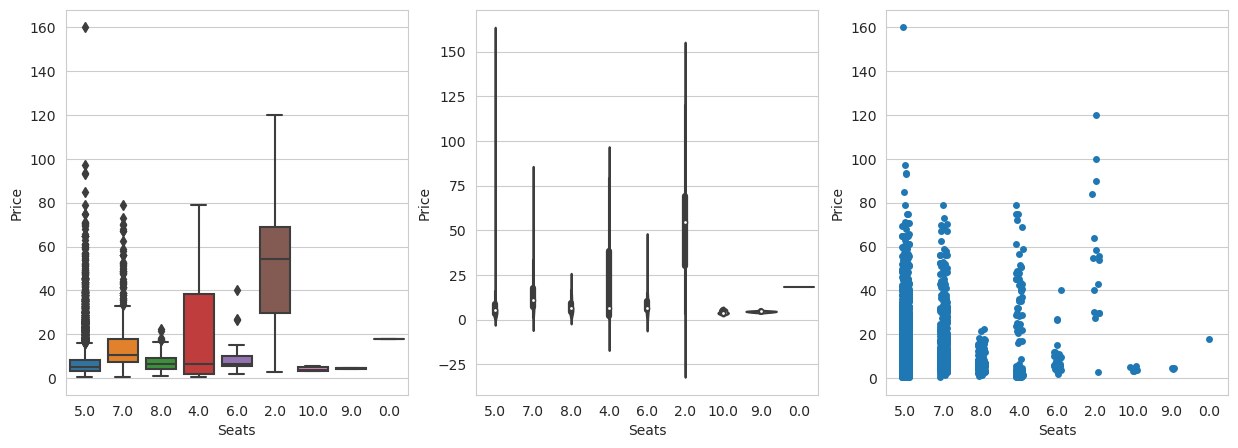

In [ ]:
x = 'Seats'
y = 'Price'
order=cars_data[x].value_counts().index
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
sns.boxplot(x=cars_data[x], y=cars_data[y], data=cars_data, order=order)
plt.subplot(1,3,2)
sns.violinplot(x=cars_data[x], y=cars_data[y], data=cars_data, order=order)
plt.subplot(1,3,3)
sns.stripplot(x=cars_data[x], y=cars_data[y], data=cars_data, order=order)

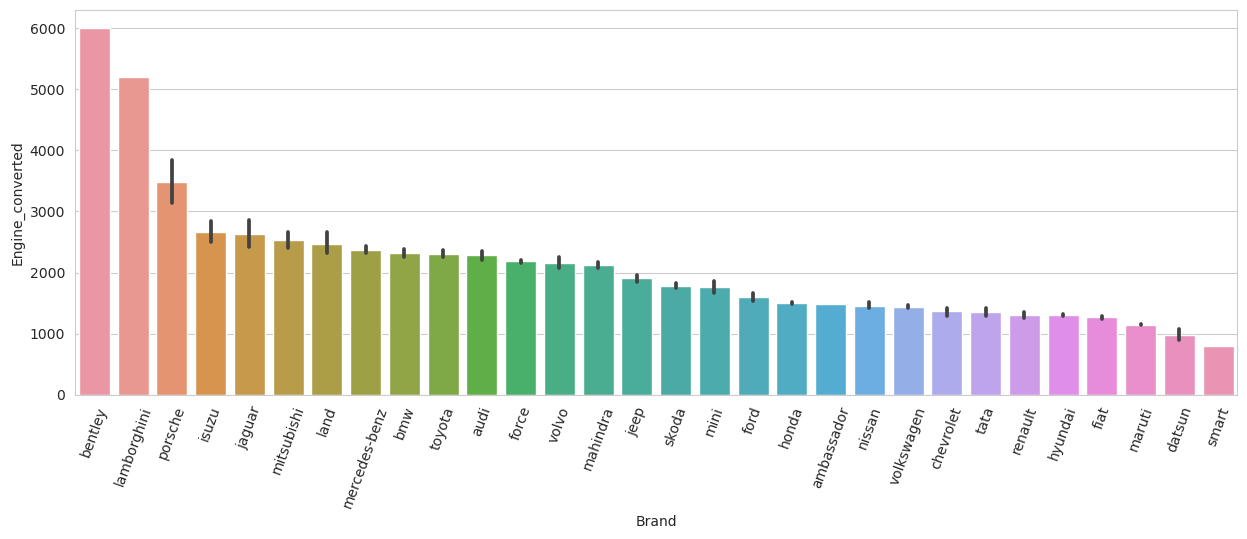

In [ ]:
x = 'Brand'
y = 'Engine_converted'
order=cars_data.groupby(x)[y].mean().sort_values(ascending=False).index
plt.figure(figsize= (15,5))
sns.barplot(x=cars_data[x], y=cars_data[y], data=cars_data, order=order)
plt.xticks(rotation=70)
plt.show()

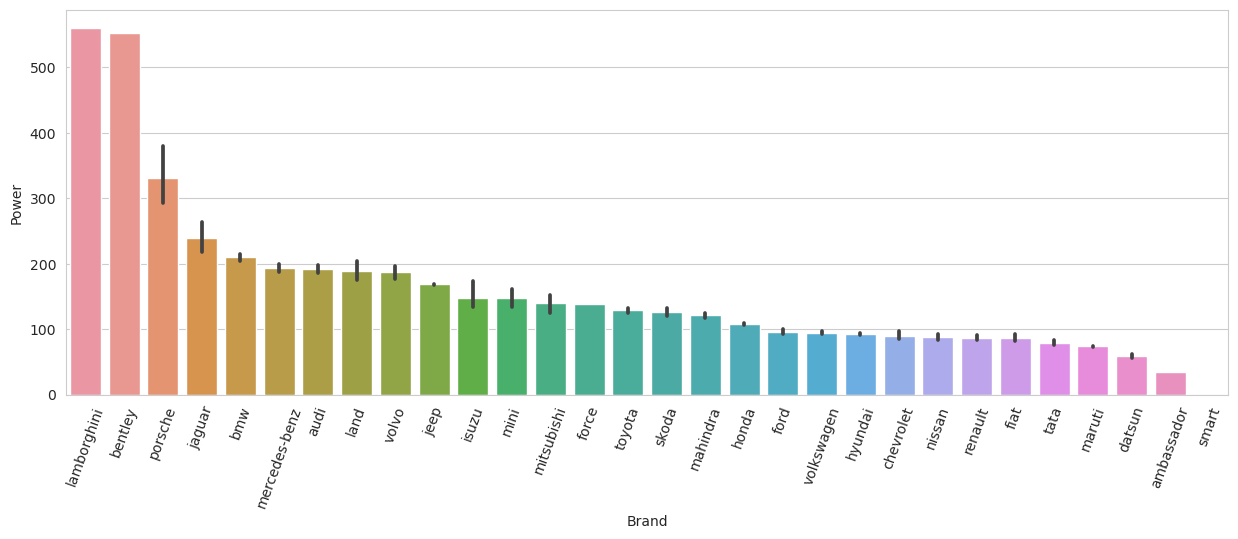

In [ ]:
x = 'Brand'
y = 'Power'
order=order=cars_data.groupby(x)[y].mean().sort_values(ascending=False).index
plt.figure(figsize= (15,5))
sns.barplot(x=cars_data[x], y=cars_data[y], data=cars_data, order=order)
plt.xticks(rotation=70)
plt.show()

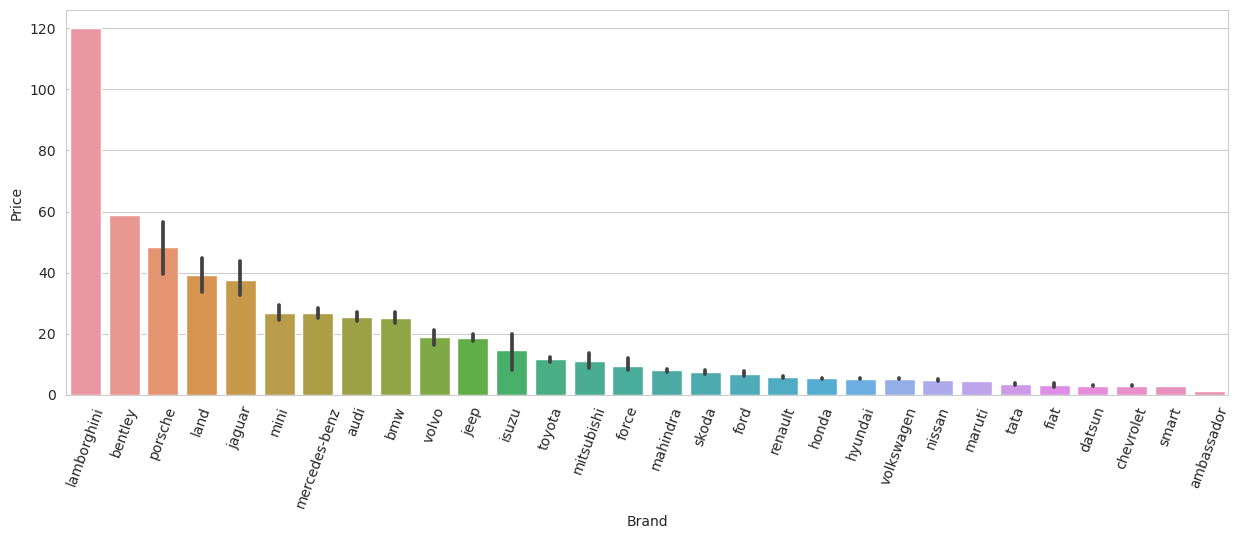

In [ ]:
x = 'Brand'
y = 'Price'
order=order=cars_data.groupby(x)[y].mean().sort_values(ascending=False).index
plt.figure(figsize= (15,5))
sns.barplot(x=cars_data[x], y=cars_data[y], data=cars_data, order=order)
plt.xticks(rotation=70)
plt.show()

### **Observations**
*    Diesel cars have the highest average price while CNG and LPG have the least. But the mileage is observed to be the highest among the CNG and LPG fuel types.
*    Automatic transmission cars are highly expensive in comparison to Manual transmission, although they provide lesser mileage
*    As the ownership moves from first to second to third and beyond, the price is also falling down, which is expected naturally.
*    Although very less in number, average price of 2 seater cars is the highest of all. 
* The engine size (CC) and Power of Lamborghini, Bently and Porsche are higher and we can see that price of these cars are highest as well. We can conclude that Price of car is related with engine size and Power.

# **Multivariate Analysis**

Here, we examine any possible corelation between more than 2 varables

In [ ]:
cars_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'Model', 'Year_converted',
       'Engine_converted', 'Mileage_converted', 'New_Price_converted'],
      dtype='object')

In [ ]:
# sns.pairplot(cars_data, hue = "Fuel_Type")

**Observation:** 

1.   Two-seater car with First hand owner have higher price than second hand owner. This is natural trend. 
2.   Two seater cars have significatly higher price than those of other. There must be other factor involved such as mileage, engine, power which is causing this trend. 



<seaborn.axisgrid.FacetGrid>

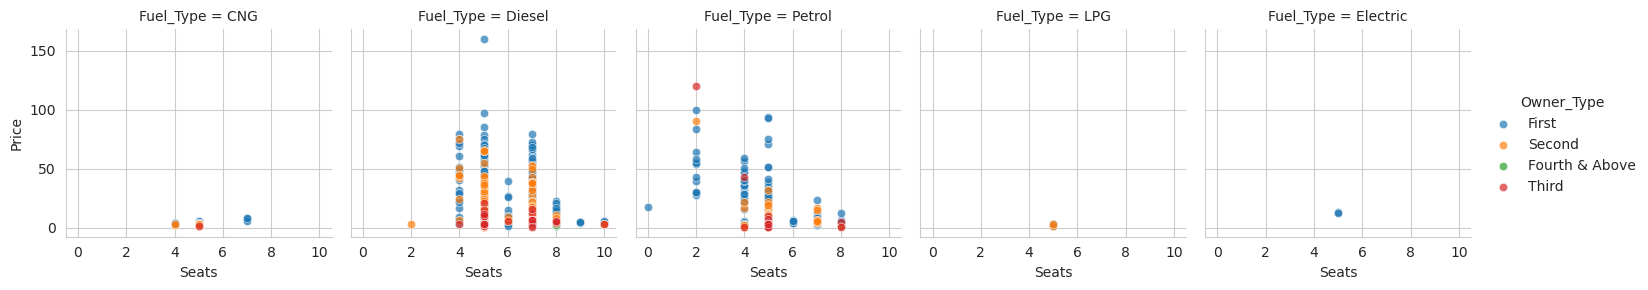

In [ ]:
g = sns.FacetGrid(cars_data, col="Fuel_Type", hue="Owner_Type")
g.map(sns.scatterplot, "Seats", "Price", alpha=.7)
g.add_legend()

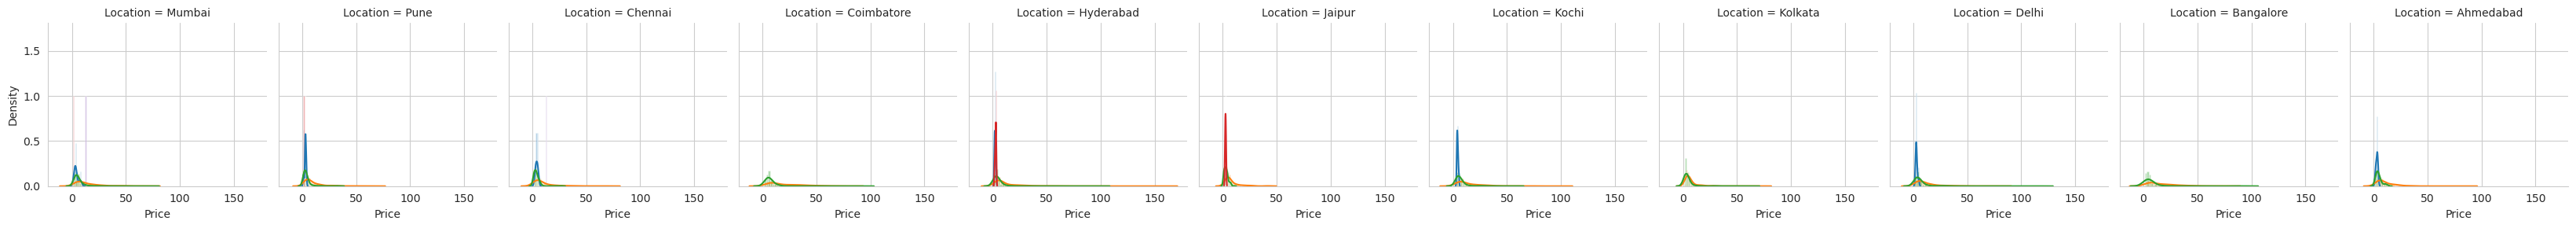

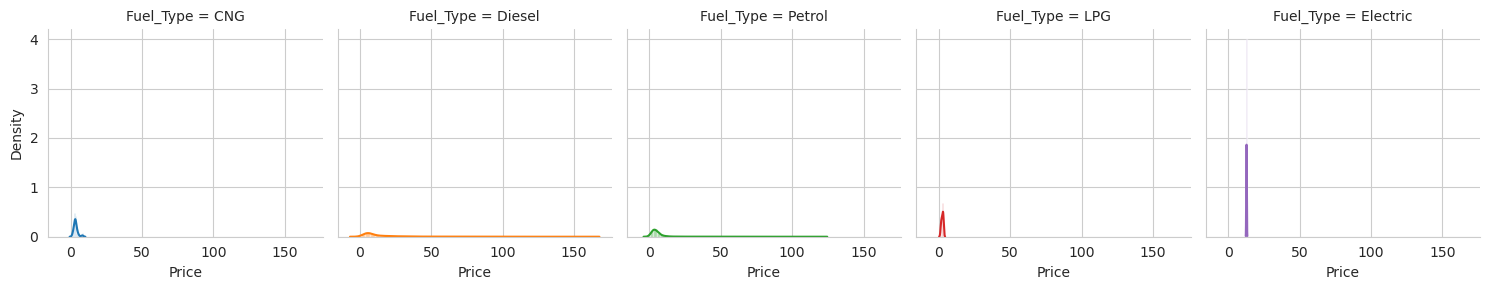

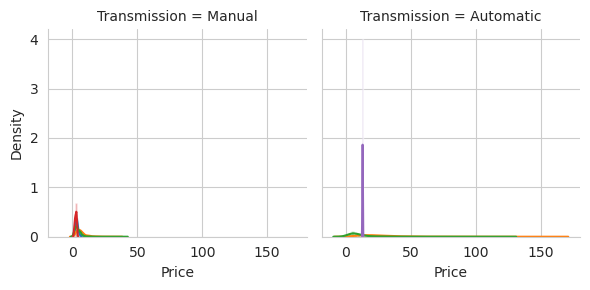

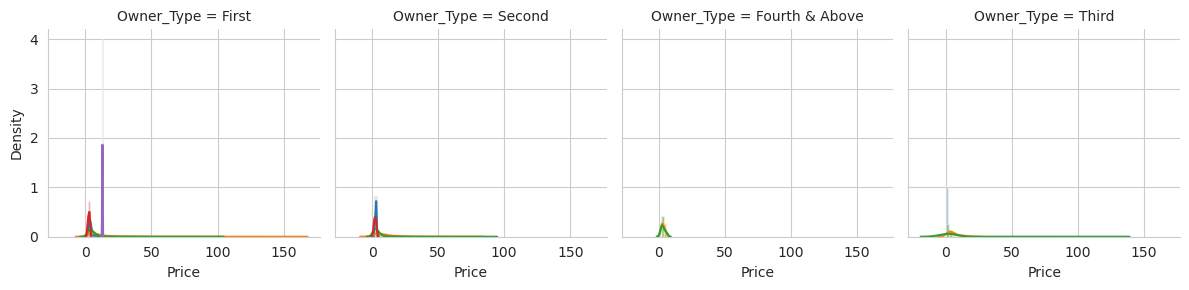

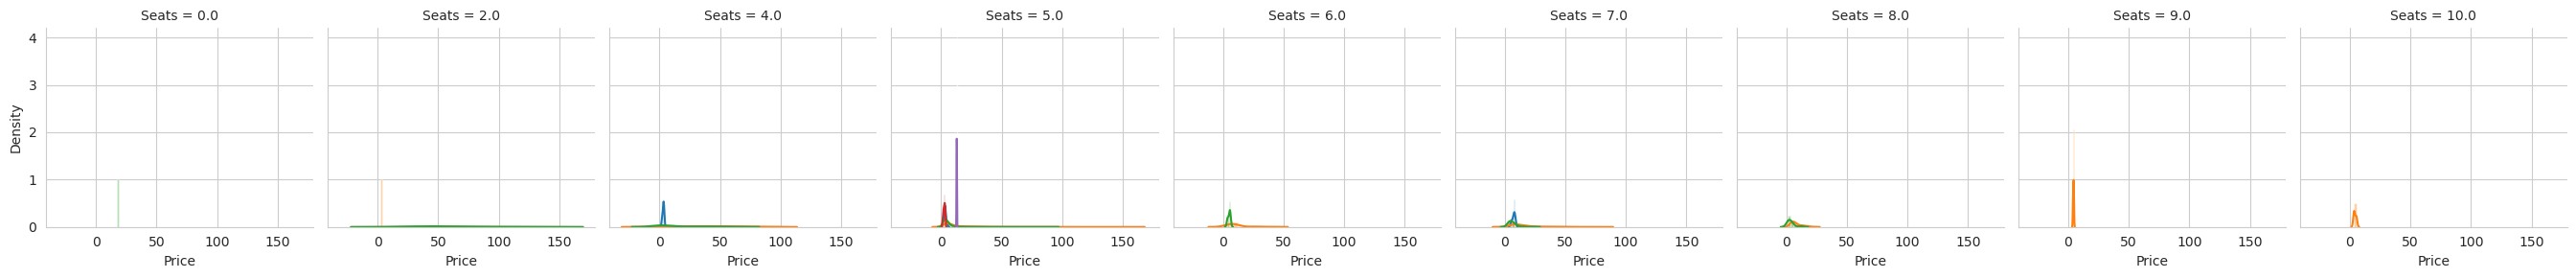

In [ ]:
for col in ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']:
  g = sns.FacetGrid(cars_data, col=col, hue = 'Fuel_Type')
  g.map(sns.distplot, "Price")

### **Observations**    
*    Average price of two seaters seems to be higher than the others
Automatic Transmission cars are costlier than Manual cars.
*    Median 4 seated car's price vastly differs between first owned and second owned.
*    Even average cost of a Third owned Automatic car is higher than the Manual transmission First owned car. 
*    4 and 5 seaters cars are preferred among others 
*    In general, Automatic cars are costlier than Manual. 



# Data Preprocessing

In [ ]:
#We're checking the no of missing values in across all the numerical columns
cars_data.select_dtypes(include = np.number).isnull().sum()

Year                      0
Kilometers_Driven         0
Power                   143
Seats                    42
Price                     0
Engine_converted         36
Mileage_converted         2
New_Price_converted    5195
dtype: int64

### Observations
*   New_Price_converted is the column with more than 83% of missing values. 
*   According to the data dictionary, the New Price is the price of a newer model. The reasons due to which the data is missing might be: 
    *   The car that we've is the latest variant and hence, a newer price cannot be found
    *   The car that we've is the latest variant of an obsolete model and there's no newer model as the model had been discontinued
*    So as not to alter the statistical significance of the variables, we choose not to impute this column. Instead, we're going to remove the column from further analysis.
*    Other columns that has missing values can be treated and proper procedures need to be followed


In [ ]:
cars_data.drop(['New_Price', 'New_Price_converted'], inplace = True, axis = 'columns')

In [ ]:
cars_data.describe(include = np.number)

,Year,Kilometers_Driven,Power,Seats,Price,Engine_converted,Mileage_converted
count,6019.00,6019.00,5876.00,5977.00,6019.00,5983.00,6017.00
mean,2013.36,58738.38,113.25,5.28,9.48,1621.28,18.35
std,3.27,91268.84,53.87,0.81,11.19,601.36,5.37
min,1998.00,171.00,34.20,0.00,0.44,72.00,0.00
25%,2011.00,34000.00,75.00,5.00,3.50,1198.00,15.26
50%,2014.00,53000.00,97.70,5.00,5.64,1493.00,18.19
75%,2016.00,73000.00,138.10,5.00,9.95,1984.00,21.10
max,2019.00,6500000.00,560.00,10.00,160.00,5998.00,60.37


In [ ]:
# Defining a funtion to remove outliers
def remove_outlier_using_iqr(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
    # return np.where((col<lower_range) | (col> upper_range))

In [ ]:
# # Defining a funtion to remove outliers using Z score
# def remove_outlier_using_zscore(col, threshold):
#     mean = np.mean(col)
#     stddev = np.std(col)
#     zscores = [ (c-mean)/stddev for c in col]
#     return np.where(np.abs(zscores)>threshold), np.abs(zscores)>threshold 
# a, b = remove_outlier_using_zscore(cars_data['Price'], 3)

In [ ]:
for column in cars_data.drop('Price',axis=1).columns:
    if cars_data[column].dtype != 'object':
        lr,ur=remove_outlier_using_iqr(cars_data[column])
        cars_data[column]=np.where(cars_data[column]>ur,ur,cars_data[column])
        cars_data[column]=np.where(cars_data[column]<lr,lr,cars_data[column])

<AxesSubplot: title={'center': 'Without Outliers'}>

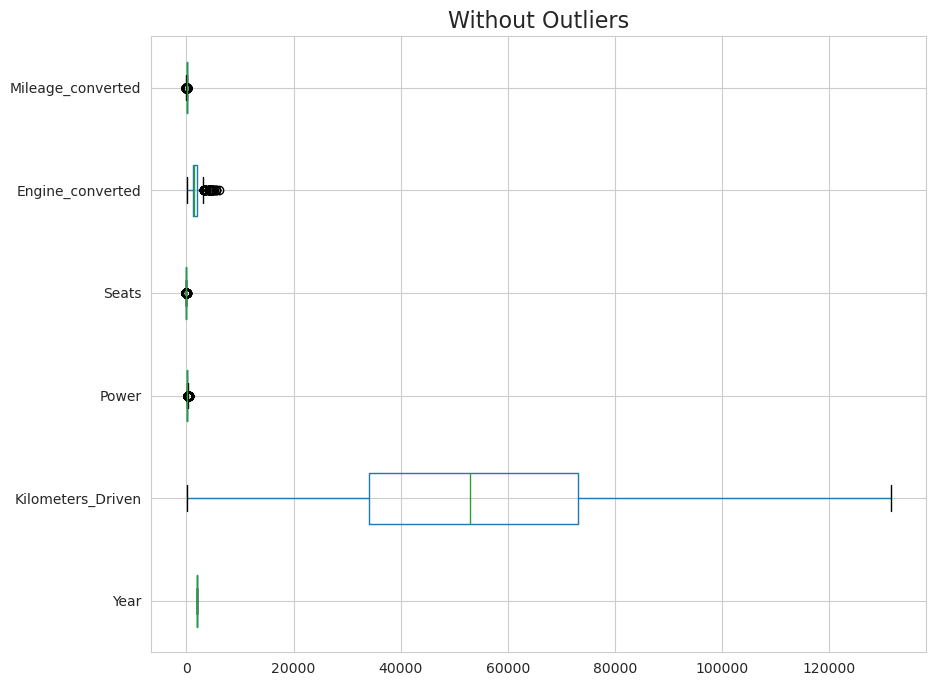

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Without Outliers',fontsize=16)
cars_data.drop('Price',axis=1).boxplot(vert=0)

In [ ]:

cars_data['Brand'] = cars_data['Name'].apply(get_brand)

imputer = KNNImputer(n_neighbors=5)
cars_data['Mileage_converted'] = imputer.fit_transform(cars_data[['Mileage_converted']])

imputer = KNNImputer(n_neighbors=5)
cars_data['Engine_converted'] = imputer.fit_transform(cars_data[['Engine_converted']])

imputer = KNNImputer(n_neighbors=5)
cars_data['Power'] = imputer.fit_transform(cars_data[['Power']])

In [ ]:
cars_data.drop(['Name', 'Engine', 'Mileage', 'Seats'], axis = 1, inplace = True)

In [ ]:
# def get_encoded_values(df, cols):
#     df = pd.get_dummies(df, columns = cols, drop_first=True)
#     return df

In [ ]:
cars_data['Location'] = pd.factorize(cars_data['Location'])[0]
cars_data['Fuel_Type'] = pd.factorize(cars_data['Fuel_Type'])[0]
cars_data['Transmission'] = pd.factorize(cars_data['Transmission'])[0]
cars_data['Owner_Type'] = pd.factorize(cars_data['Owner_Type'])[0]
cars_data['Brand'] = pd.factorize(cars_data['Brand'])[0]
cars_data['Model'] = pd.factorize(cars_data['Model'])[0]
cars_data['Year_converted'] = pd.factorize(cars_data['Year_converted'])[0]

In [ ]:
cars_data.isna().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Power                0
Price                0
Brand                0
Model                0
Year_converted       0
Engine_converted     0
Mileage_converted    0
dtype: int64

In [ ]:
X = cars_data.drop(['Price'], axis=1)
y= cars_data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [ ]:
# Define the regression models
models = [LinearRegression(), 
            Ridge(), Lasso(),
            SVR(),
            DecisionTreeRegressor(),
            RandomForestRegressor(),
            XGBRegressor(),
            MLPRegressor()]
# Loop through the models
for model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the MSE, MAPE, RMSE, MAE, and R2 score
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Print the results
    print("Model: ", model)
    print("MAE: ", mae)
    print("RMSE: ", rmse)
    print("R2: ", r2)
    print("\n")

Model:  LinearRegression()
MAE:  3.6415372797227743
RMSE:  5.632468282695262
R2:  0.7328543002522514


Model:  Ridge()
MAE:  3.6414609875162434
RMSE:  5.632515458008276
R2:  0.7328498252213587


Model:  Lasso()
MAE:  3.6897284447525447
RMSE:  5.8071099813232205
R2:  0.7160310990597003


Model:  SVR()
MAE:  5.908750093479237
RMSE:  11.267358225075293
R2:  -0.06904228174386184


Model:  DecisionTreeRegressor()
MAE:  1.9939008859357696
RMSE:  4.529978831617312
R2:  0.8272002844513386


Model:  RandomForestRegressor()
MAE:  1.4354677858197549
RMSE:  3.046582601797037
R2:  0.9218414320798497


Model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=